In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Module 3\Bike Sharing\data_bike_sharing.csv')
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


## Data Cleaning

In [3]:
df.info() #check if there is null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

There is no null data 

In [5]:
df.duplicated().sum() #check if there is duplicated data

0

There is no duplicated data

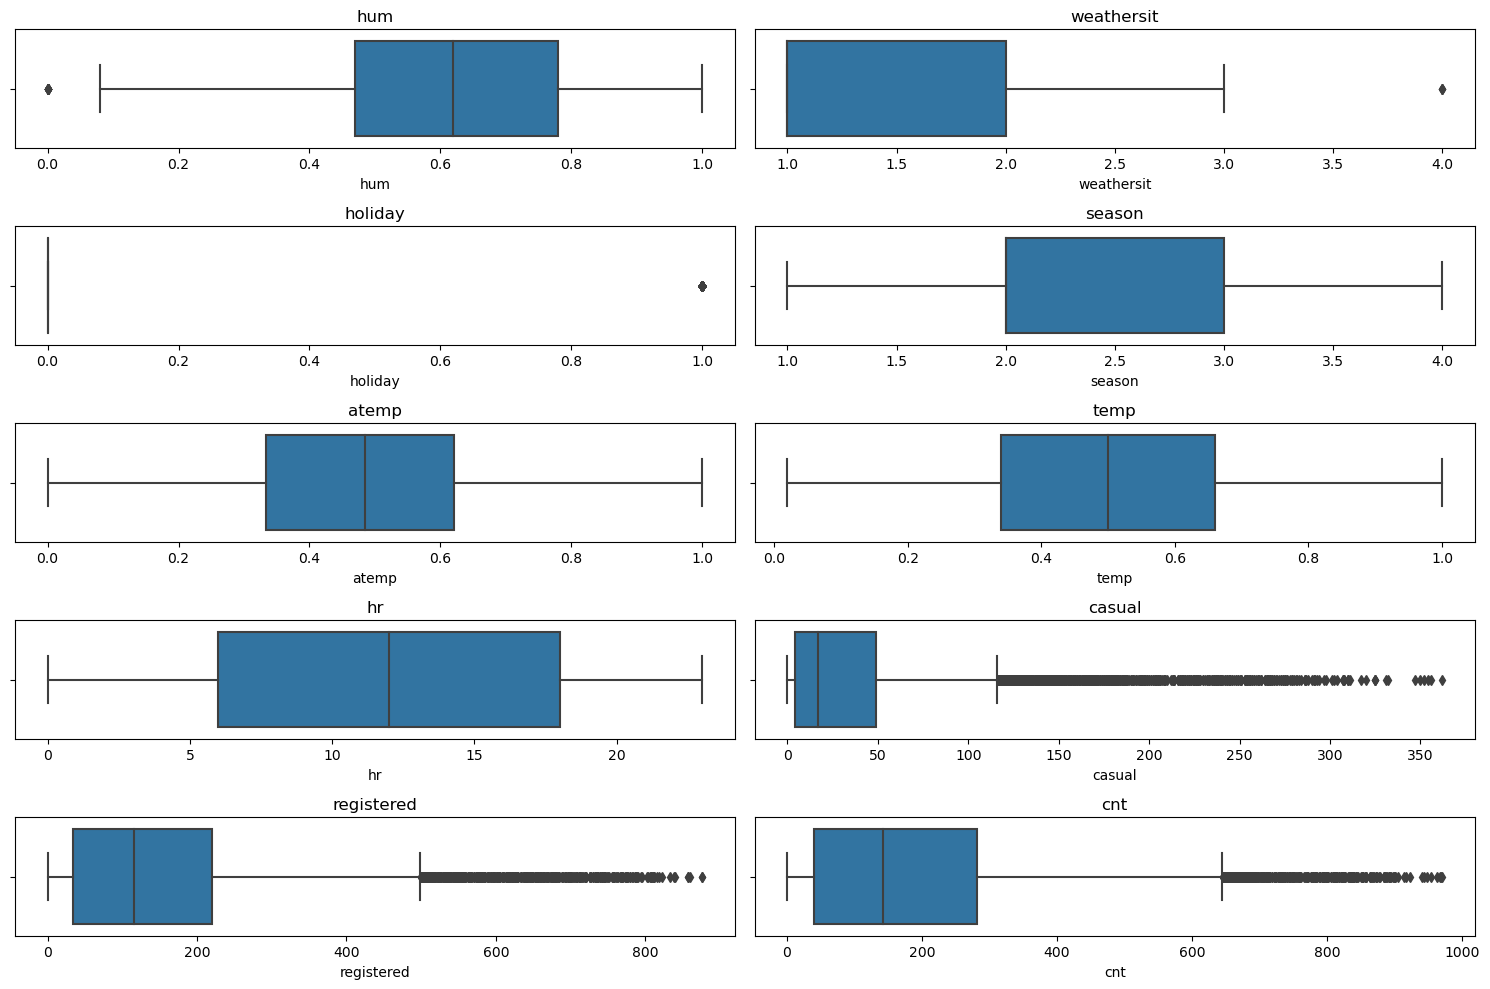

In [6]:
import warnings
warnings.filterwarnings('ignore')

num_feature = df.drop(['dteday'],axis=1)

plt.figure(figsize=(15, 10), facecolor='white')
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(5, 2, plotnumber)
    sns.boxplot(data = df, x = feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout();

From the distribution above we can see that hum, casual, registered, and cnt have outliers data.

1. hum as humidity technically can't have 0% value therefore we going to drop them
2. casual, registred, and cnt although have outliers it's still make sense that in a day have more customer than the other day.

In [7]:
df = df.drop(df[df['hum'] == 0].index) #drop row of hum column value with 0% 

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%Y-%m-%d') #change the type to datetime type

In [9]:
df.insert(1,'year', df['dteday'].dt.year)
df.insert(2,'month', df['dteday'].dt.month)
df.insert(3,'dayofweek', df['dteday'].dt.day_of_week)
df #extract month, year, and day of the datetime since the data must be numerical data to do machine learning

,dteday,year,month,dayofweek,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,2011,12,4,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,2012,6,6,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,2011,6,2,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,2012,3,5,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,2012,7,1,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,2012,1,2,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,2012,7,4,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,2012,2,0,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,2012,3,5,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [10]:
df.drop(columns='dteday', inplace = True) 
df #it is no longer necessary since we extracted the datetime into year, month, day

,year,month,dayofweek,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011,12,4,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012,6,6,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011,6,2,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012,3,5,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012,7,1,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012,1,2,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012,7,4,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012,2,0,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012,3,5,0.77,2,0,2,0.4242,0.42,2,14,55,69


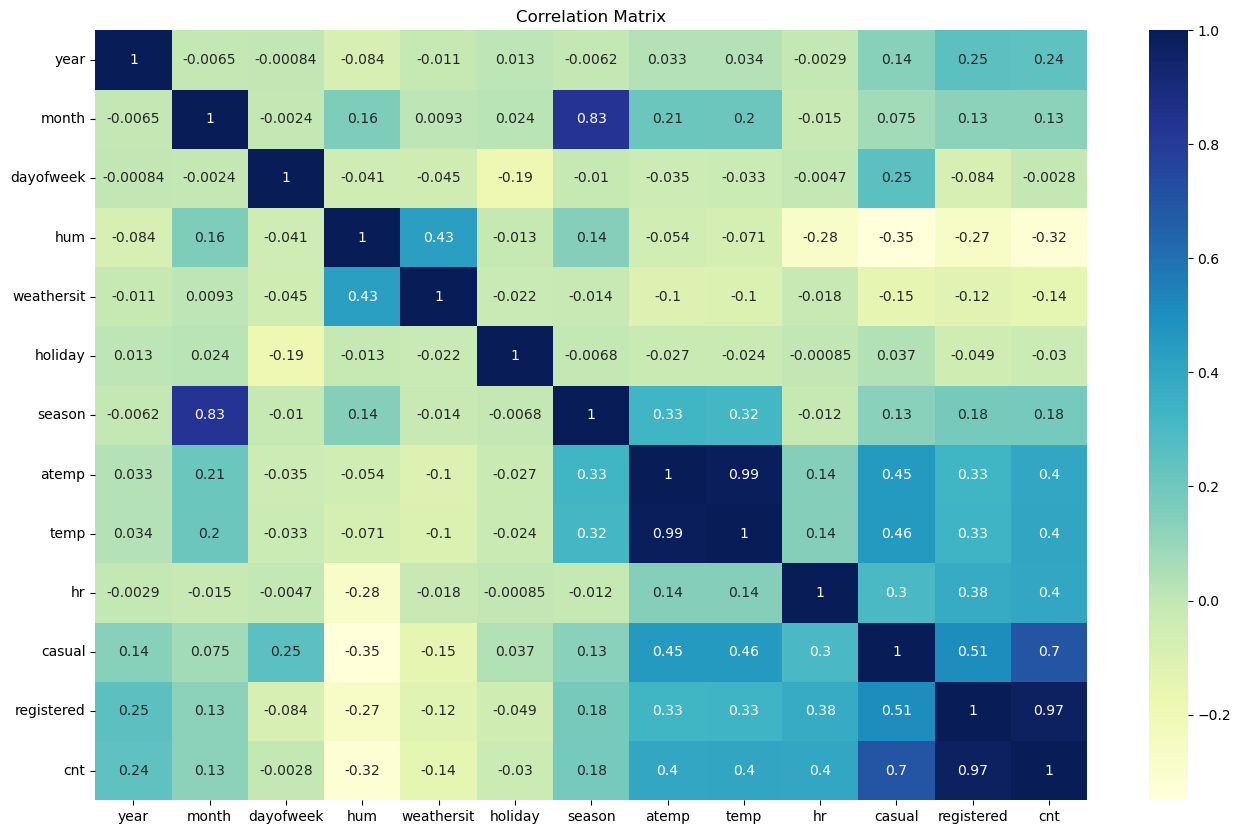

In [11]:
# from above graphs we can say that temp and atemp have a relationship
# let's check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

Value above 0.75 is have high correlatation and need to be drop to avoid multicollinearity
1. High correlation between atemp and temp : Drop atemp
2. Cnt is the sum of casual and registerd which means they will have a high correlation : drop casual and registered
3. Month and season also have a high correlation due to most of the time season can be defined by their months. Let's try to remove season.

In [12]:
df.drop(columns=['casual', 'registered', 'atemp', 'season'], inplace = True)
df

,year,month,dayofweek,hum,weathersit,holiday,temp,hr,cnt
0,2011,12,4,0.62,1,0,0.36,16,250
1,2012,6,6,0.64,1,0,0.54,4,18
2,2011,6,2,0.53,1,0,0.62,23,107
3,2012,3,5,0.87,2,0,0.36,8,145
4,2012,7,1,0.55,1,0,0.76,18,857
...,...,...,...,...,...,...,...,...,...
12160,2012,1,2,0.75,1,0,0.24,7,257
12161,2012,7,4,0.62,1,0,0.78,0,102
12162,2012,2,0,0.60,2,1,0.24,5,6
12163,2012,3,5,0.77,2,0,0.42,2,69


In [13]:
# Define Features (X) and Target (y)
X = df.drop(columns=['cnt'])
y = df['cnt']

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=31
)

Categorical features need to be converted into numerical features to utilize all selected features. We can use ColumnTransformer to perform this data type conversion, which can then be applied within the model pipeline.

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

transformer = ColumnTransformer([
    ('standard', StandardScaler(), ['hum', 'holiday','temp','hr','month','dayofweek','weathersit', 'year']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard', StandardScaler(),
                                 ['hum', 'holiday', 'temp', 'hr', 'month',
                                  'dayofweek', 'weathersit', 'year'])])

In [15]:
# Algorithm ML
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor # boosting
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
# cross validation to determine the best algorithm
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.model_selection import cross_validate

# Define models
linreg = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=31)
rf = RandomForestRegressor(random_state=31)
gboost = GradientBoostingRegressor(random_state=31)

estimators = [
    ('linreg', LinearRegression()),
    ('tree', DecisionTreeRegressor(random_state=31)),
    ('knn', KNeighborsRegressor()),
    ('rf', RandomForestRegressor(random_state=31)),
    ('gboost' , GradientBoostingRegressor(random_state=31))
]


models = {'KNN': knn,
          'Decision Tree': tree,
          'Linear Regression' : linreg,
          'Random Forest' : rf,
          'Gradient Boosting' : gboost
          }

metrics = {'RMSE': 'neg_root_mean_squared_error',
           'MAE': 'neg_mean_absolute_error',
           'MAPE': 'neg_mean_absolute_percentage_error',
        }


test_rmse_arr = []
test_mae_arr = []
test_mape_arr = []
list_algo = []



for name_algo,model in models.items():
    crossval = KFold(n_splits=5)#resampling

    estimator = Pipeline([
        ('transorm', transformer),
        ('model', model),
    ])

    list_algo.append(name_algo)
    scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
    test_rmse_arr.append(scores['test_RMSE'].mean())
    test_mae_arr.append(scores['test_MAE'].mean())
    test_mape_arr.append(scores['test_MAPE'].mean())


for name_algo,model in models.items():
    model_ttr = TransformedTargetRegressor(model, func=np.log, inverse_func=np.exp)
    crossval = KFold(n_splits=5)

    estimator = Pipeline([
        ('transorm', transformer),
        ('model', model_ttr),
    ])

    list_algo.append(f'{name_algo} + Transformed Target Regressor')
    scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
    test_rmse_arr.append(scores['test_RMSE'].mean())
    test_mae_arr.append(scores['test_MAE'].mean())
    test_mape_arr.append(scores['test_MAPE'].mean())



model_table = pd.DataFrame({
    'model': list_algo,
    'RMSE': test_rmse_arr,
    'MAE': test_mae_arr,
    'MAPE': test_mape_arr,
})

model_table.sort_values(by = 'MAE', ascending=False)

,model,RMSE,MAE,MAPE
8,Random Forest + Transformed Target Regressor,-47.601149,-28.649747,-0.289820
3,Random Forest,-48.219387,-29.094882,-0.355223
1,Decision Tree,-64.443599,-38.043101,-0.412715
6,Decision Tree + Transformed Target Regressor,-65.860878,-38.435971,-0.405102
9,Gradient Boosting + Transformed Target Regressor,-78.632936,-48.807054,-0.398160
4,Gradient Boosting,-72.415302,-49.122359,-0.926079
5,KNN + Transformed Target Regressor,-106.158262,-64.662741,-0.754972
0,KNN,-101.158180,-66.829292,-1.415475
2,Linear Regression,-143.060948,-107.212094,-3.310111
7,Linear Regression + Transformed Target Regressor,-165.638568,-110.015366,-1.421536


The best scoring model are random forest regressor with transformed target regressor.

A Random Forest Regressor consists of a collection of decision trees, where each tree is built on a random subset of the training data and a random subset of features.
Random Forest Regressor is a powerful and versatile algorithm that is widely used in practice due to its ability to handle complex regression tasks, robustness to overfitting, and ease of use. It performs well on a wide range of datasets and is less prone to overfitting compared to individual decision trees.

In [16]:
# metrics for regression
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score,mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

# Define models

rf_ttr = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)

model_before_tuning = Pipeline([
    ('transform', transformer),
    ('model', rf_ttr)
])


test_rmse_arr = []
test_mae_arr = []
test_mape_arr = []
list_algo = []



model_before_tuning.fit(X_train, y_train)
y_pred_before_tuning = model_before_tuning.predict(X_test)
list_algo.append('Random Forest Transformed Before Tuning')
test_rmse_arr.append(np.sqrt(mean_squared_error(y_test,y_pred_before_tuning)))
test_mae_arr.append(mean_absolute_error(y_test,y_pred_before_tuning))
test_mape_arr.append(mean_absolute_percentage_error(y_test,y_pred_before_tuning))

model_result = pd.DataFrame({
    'model': list_algo,
    'RMSE': test_rmse_arr,
    'MAE': test_mae_arr,
    'MAPE': test_mape_arr,

})

model_result

,model,RMSE,MAE,MAPE
0,Random Forest Transformed Before Tuning,48.202684,28.429068,0.279637


From the MAE score of 28,43 we can assume that the model prediction can be off by more or less 29 bikes. And for MAPE score of 28% the model has a low accuracy but still acceptable.

Mean absolute percentage error measures the average magnitude of error produced by a model, or how far off predictions are on average.

## Predict with hyperparameter tuning

Random Forest Regressor has various hyperparameters that control the behavior of the model, such as the number of trees in the forest (n_estimators), maximum depth of the trees (max_depth), minimum number of samples required to split an internal node (min_samples_split), etc.
These hyperparameters can be tuned to optimize the performance of the model on a given dataset.


In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grids = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]         # Method of selecting samples for training each tree
}

rf = RandomForestRegressor(random_state=31)
rf_ttr = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
model_after_tuning = Pipeline([
    ('transform', transformer),
    ('model', rf)
])
grid_search = GridSearchCV(estimator=rf, param_grid=param_grids, cv=5, scoring = 'neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=31), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='neg_mean_absolute_error')

In [51]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [57]:
model_after_tuning = grid_search.best_estimator_
model_after_tuning.fit(X_train, y_train)

y_pred_after_tuning = model_after_tuning.predict(X_test)
list_algo.append('Random Forest Transformed After Tuning')
test_rmse_arr.append(np.sqrt(mean_squared_error(y_test,y_pred_after_tuning)))
test_mae_arr.append(mean_absolute_error(y_test,y_pred_after_tuning))
test_mape_arr.append(mean_absolute_percentage_error(y_test,y_pred_after_tuning))

model_result = pd.DataFrame({
    'model': list_algo,
    'RMSE': test_rmse_arr,
    'MAE': test_mae_arr,
    'MAPE': test_mape_arr,
})


model_result

,model,RMSE,MAE,MAPE
0,Random Forest Transformed Before Tuning,48.202684,28.429068,0.279637
1,Random Forest Transformed After Tuning,48.906012,28.894419,0.351995


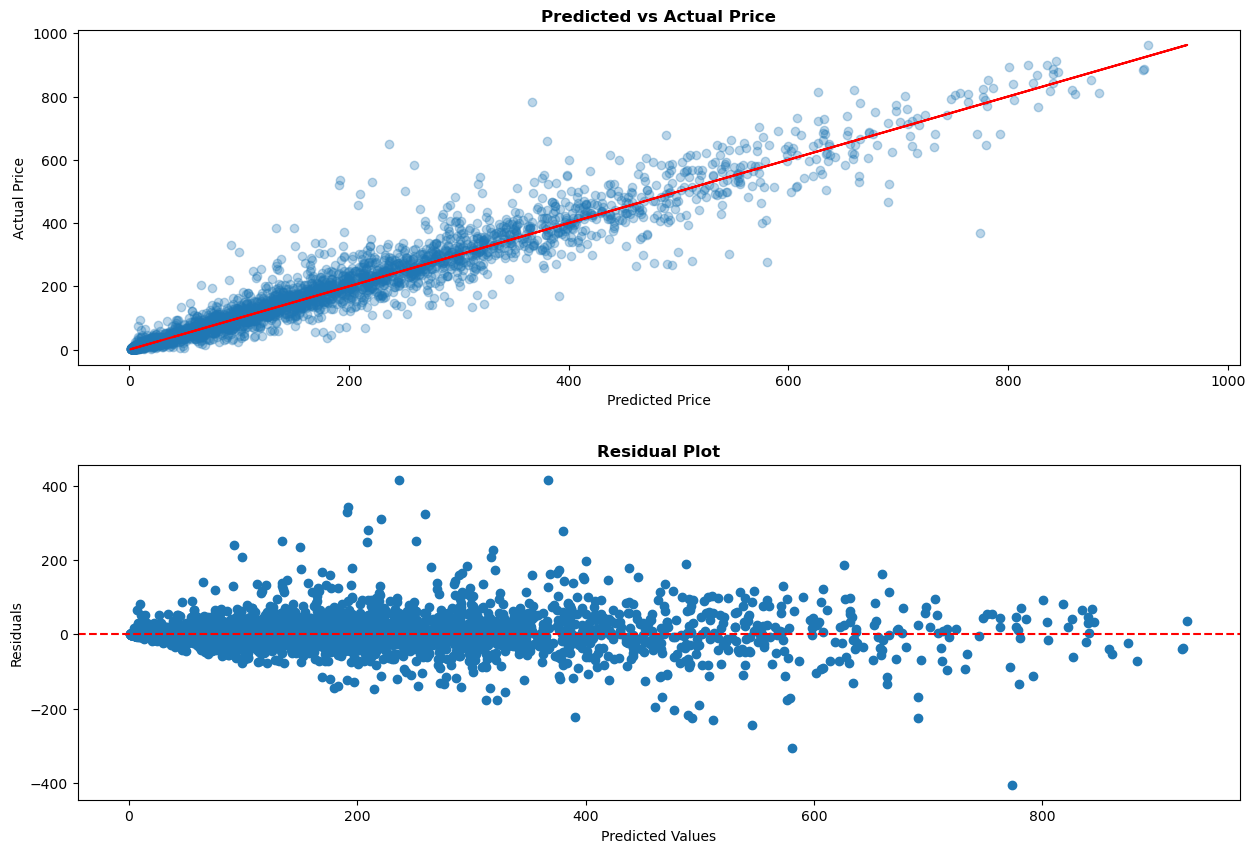

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot actual vs predicted price
ax1.scatter(y_pred_before_tuning, y_test, alpha=0.3)
ax1.plot(y_test, y_test, color='r', alpha=1)
ax1.set_title('Predicted vs Actual Price', fontweight='bold')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Actual Price')

# Plot residual plot
diff = y_test - y_pred_before_tuning
ax2.scatter(y_pred_before_tuning, diff)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot', fontweight='bold')

plt.subplots_adjust(hspace=0.3)

In [17]:
data = pd.DataFrame(y_test).rename(columns={'cnt':'true'})
data['pred'] = y_pred_before_tuning
data['bins'] = pd.cut(x=data['true'], 
                      bins=[1, 250,500 ,750 , 1000], 
                      labels=['1-250', '250-500', '500-750', '750-1000'])
data.head() # divide into few category of bins

,true,pred,bins
7305,40,65.706494,1-250
1844,607,672.318172,500-750
11077,257,377.671522,250-500
4676,276,218.196092,250-500
9141,665,665.617277,500-750


In [18]:
def mape(data):
    return mean_absolute_percentage_error([data['true']], [data['pred']])

data['mape'] = data[['true','pred']].apply(mape, axis=1)
data

,true,pred,bins,mape
7305,40,65.706494,1-250,0.642662
1844,607,672.318172,500-750,0.107608
11077,257,377.671522,250-500,0.469539
4676,276,218.196092,250-500,0.209434
9141,665,665.617277,500-750,0.000928
...,...,...,...,...
5555,74,7.558472,1-250,0.897858
3318,32,16.598937,1-250,0.481283
9968,5,6.263146,1-250,0.252629
3806,3,6.578078,1-250,1.192693


In [19]:
data.groupby('bins')[['mape']].mean() #average of the mean absolute percentage error


,mape
bins,
1-250,0.319555
250-500,0.135504
500-750,0.121841
750-1000,0.075751


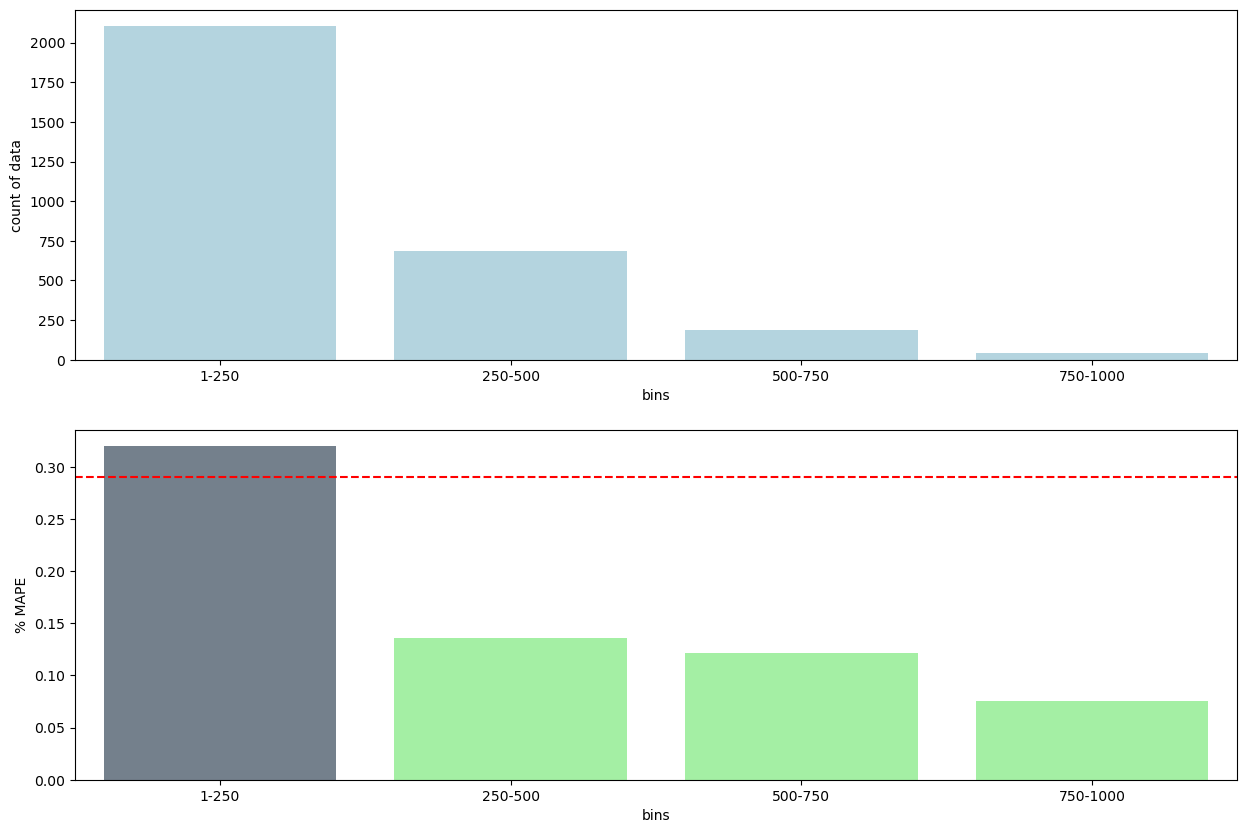

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(data=data, x='bins', color='lightblue', ax=ax1)
ax1.set_ylabel('count of data')

data_by = data.groupby('bins')[['mape']].mean()
cols = ['palegreen' if x < 0.29 else '#708090' for x in data_by['mape']]
sns.barplot(data=data, x='bins', y='mape', 
            palette=cols, ax=ax2, 
            estimator='mean',
            errorbar=None)
ax2.axhline(y=0.29, color='red', ls='--');
ax2.set_ylabel('% MAPE');

## Features Importances

We can identify the actual features that significantly influence the target (cnt) by using the feature_importances_ function.

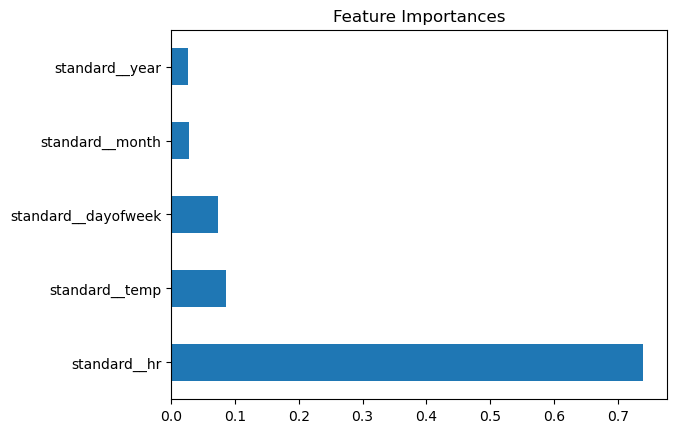

In [321]:
feature_imp = pd.Series(model_before_tuning.named_steps['model'].regressor_.feature_importances_,model_before_tuning.named_steps['transform'].get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

Based on the feature importance result, it seems that the most influential factor affecting the model is the hour or time of day during which the bike is being used.

## Conclusion
After preprocessing steps including cleaning, encoding, and scaling the dataset, 5 different machine learning models were tested. Each model was also evaluated using a transform target regressor. The most effective model was determined to be Random Forest with a transform target regressor, showcasing RMSE of 48.2, MAE of 28.43, and MAPE of 0.28. Despite attempts at hyperparameter tuning, the initial default settings for Random Forest yielded better results than the tuned configurations. the model continued to perform best with the default Random Forest settings. An analysis of the scatterplot revealed that the model exhibited inaccurate predictions for larger predicted values.

Upon examining scatter and residual plots, a pattern emerged suggesting that higher predicted values corresponded to higher errors. To gain a more objective assessment, the data was categorized into five bins: 1-250, 250-500, 500-750, 750-1000. Surprisingly, the bin encompassing the range 1-250 exhibited a notably higher count of data instances compared to the others. The subsequent creation of a bar chart with a delineating line at a MAPE value of 0.29 revealed that the first bin displayed an average error surpassing this threshold, while the larger bins remained below it. The visualization in the form of a count plot and a bar plot highlighted different observations, emphasizing the need for further investigation and potential reevaluation of the model's performance.

## Recommendation

To elevate our predictive model and align it closely with business objectives, we propose the following strategies:

1. Augmenting Data Collection with Business-Critical Features: Augmenting the dataset with key business-related features such as location data, period of bike use, and total kilometers traveled by the bike can offer valuable insights. Understanding usage patterns in specific locations and during certain periods allows leading to improved customer experience and increased ridership. 


2. Exploring Advanced Machine Learning Algorithms for Precise Demand Insights: exploring sophisticated algorithms beyond traditional models, like Support Vector Machines, Neural Networks, and ensemble methods like stacking can capture complex patterns in demand. 


3. Monitoring and Continuous Model Refinement for Effective Business Strategies: Establishing a robust monitoring system to evaluate the model's performance in real-time against defined business metrics is essential. Continuous model refinement based on real-world performance ensures that the predictive tool remains aligned with business goals such as business strategies and investment decisions, fostering growth and competitive advantage.


4. By incorporating these business-centric recommendations, we aim to not only refine our predictive model but also generate actionable insights that drive strategic decision-making and positively impact the bikeshare system's operational efficiency, safety measures, and overall customer satisfaction, contributing to a successful and sustainable business.